aNAND tIRKEY

<img src="pic/img23.png" alt="jovian certificate" style="width: 500px;"/>

Evaluation Criteria:  
Submission were evaluated using the following criteria:

    """"Dataset must contain at least 3 columns and 150 rows of data
        You must ask and answer at least 4 questions about the dataset
        Your submission must include at least 4 visualizations (graphs)
        Your submission must include explanations using markdown cells, apart from the code.
        Your work must not be plagiarized i.e. copy-pasted for somewhere else.""""

# Data Analysis on Indian's political Donation DataSet

#### India is a symbol to all the Democratic System in the world. A strong believer of "To the people, By the People, For the people" thus has a multi-party system to effectively represent every exclusive individual or a community. An Ideal Democracy has Effective participation, Equality in the voting and Informed electorate.

## The Aim of this Notebook is to Analyze the political fundings as a part of a Citizen's exercise to be an informed electorate.

In [1]:
import numpy as np
import platform
import matplotlib as mpl                   #importing libraries
import matplotlib.pylab as plt
print(platform.python_version())
print(np.__version__)
print(mpl.__version__)
print(plt.__version__)

3.7.9
1.19.1
3.3.1
1.19.1


In [2]:
import pandas as pd                   #importing library
print(pd.__version__) 

1.1.1


In [3]:
import seaborn as sns
plt.rcParams['figure.figsize']=[15,10]

In [4]:
%%HTML                                     
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

#Used to add style to dataFrames

In [5]:
sns.set_style('dark')                    #used to add styles to seaborn plots
sns.set_context('talk')

In [6]:
import jovian
project_name = "political-donations-project"

<IPython.core.display.Javascript object>

[jovian] Update Available: 0.2.18 --> 0.2.20
[jovian] Run `!pip install jovian --upgrade` to upgrade


# Importing Dataset 

In [7]:
df=pd.read_csv('data_set/DonationsIndia.csv', index_col=0)  #importing Data Set
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,Financial Year
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,"Cheque, State Bank of India Parliament House N...",2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,Through Bank Transfer,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,Through Bank Transfer,2011-12


# Perform data preparation & cleaning

In [8]:
df.columns.values.tolist()

['Party',
 'Name',
 'Type',
 'Address',
 'PAN Given',
 'Amount',
 'Contribution Mode',
 'Financial Year ']

Observation: column names have spaces  
Task: replace ' ' with '_'

In [9]:
df.columns=df.columns.str.replace(' ','_')
df.columns.values.tolist()

['Party',
 'Name',
 'Type',
 'Address',
 'PAN_Given',
 'Amount',
 'Contribution_Mode',
 'Financial_Year_']

Observation: Financial Year has extra underscore  
Task: Remove manually

In [10]:
df.rename(columns={'Financial_Year_':'Financial_Year'},inplace=True)
df.columns.values.tolist()

['Party',
 'Name',
 'Type',
 'Address',
 'PAN_Given',
 'Amount',
 'Contribution_Mode',
 'Financial_Year']

Task: Basic exploration on Dataset

In [11]:
df.shape

(13573, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13573 entries, 0 to 13572
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Party              13573 non-null  object
 1   Name               13528 non-null  object
 2   Type               13573 non-null  object
 3   Address            13573 non-null  object
 4   PAN_Given          13573 non-null  object
 5   Amount             13573 non-null  int64 
 6   Contribution_Mode  13339 non-null  object
 7   Financial_Year     13573 non-null  object
dtypes: int64(1), object(7)
memory usage: 954.4+ KB


Obeservations: there are 7 columns,6 of them have object data types,1 is integer type also there are 13573 rows  
               Most important there are some NA values.  
Task: confirm missing data.

In [13]:
df.isna().any()

Party                False
Name                  True
Type                 False
Address              False
PAN_Given            False
Amount               False
Contribution_Mode     True
Financial_Year       False
dtype: bool

In [14]:
df.isnull().sum()

Party                  0
Name                  45
Type                   0
Address                0
PAN_Given              0
Amount                 0
Contribution_Mode    234
Financial_Year         0
dtype: int64

<AxesSubplot:>

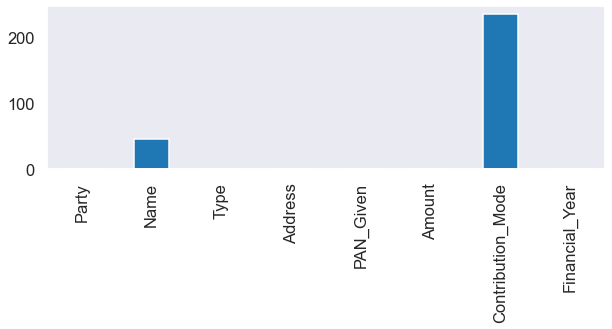

In [15]:
plt.rcParams['figure.figsize']=[10,3]

df.isnull().sum().plot.bar()

Observation: Name and Contribution Mode has Missing Values
Task: Handle Missing Data

In [16]:
df['Contribution_Mode'].nunique()

10404

## Handling Missing Data

Observation: Contribution_Mode has too Many missing and Unique values also This column has No relevence to Insight I seek   ThereFore Droping it.  
Task: Drop Feature "Contribution_Mode"

In [17]:
copy=df.drop(["Contribution_Mode"],axis=1)
copy.head()

,Party,Name,Type,Address,PAN_Given,Amount,Financial_Year
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,2011-12


In [18]:
null_filt=(copy['Name'].isnull()==True)
copy[null_filt].head(5)

,Party,Name,Type,Address,PAN_Given,Amount,Financial_Year
6401,BJP,NaN,Others,--,N,300000,2012-13
6402,BJP,NaN,Others,--,N,250000,2012-13
6403,BJP,NaN,Others,--,N,200000,2012-13
6404,BJP,NaN,Others,--,N,151000,2012-13
6405,BJP,NaN,Others,--,N,150000,2012-13


In [19]:
(copy['Name'].isnull().sum()/13573)*100

0.3315405584616518

Observation:only 0.3 percent data is missing.
Task: Replacing Na values as Anonymous

In [20]:
copy["Name"].fillna("Anonymous", inplace = True)
copy[copy['Name']=='Anonymous'].head(5)

,Party,Name,Type,Address,PAN_Given,Amount,Financial_Year
6401,BJP,Anonymous,Others,--,N,300000,2012-13
6402,BJP,Anonymous,Others,--,N,250000,2012-13
6403,BJP,Anonymous,Others,--,N,200000,2012-13
6404,BJP,Anonymous,Others,--,N,151000,2012-13
6405,BJP,Anonymous,Others,--,N,150000,2012-13


In [21]:
copy.isnull().sum()

Party             0
Name              0
Type              0
Address           0
PAN_Given         0
Amount            0
Financial_Year    0
dtype: int64

no Null values

observation: Address data is not usable  
Task: Convert Address to usable Format

#### using Indian Cities Data to convert Addresses To States

In [22]:
indian_Cities_Data=pd.read_csv('data_set/Indian_Cities_Data.csv')  #importing Data Set
indian_Cities_Data.head()

,City,State,District
0,1 SGM,Rajasthan,Ganganagar
1,3 STR,Rajasthan,Ganganagar
2,A.Thirumuruganpoondi,Tamil Nadu,Coimbatore
3,A.Vellalapatti,Tamil Nadu,Madurai
4,Aadityana,Gujarat,Porbandar


In [23]:
copy["State"] = np.nan  #Adding New Column To Data Set and putting them as NaN Values
copy.head(5)

,Party,Name,Type,Address,PAN_Given,Amount,Financial_Year,State
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,2010-11,NaN
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,2014-15,NaN
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,2014-15,NaN
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,2011-12,NaN
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,2011-12,NaN


In [24]:
copy.dtypes

Party              object
Name               object
Type               object
Address            object
PAN_Given          object
Amount              int64
Financial_Year     object
State             float64
dtype: object

observation: State column is float DataType  
Task: Convert column Datatype to object dataType

In [25]:
copy["State"]=copy["State"].astype('object')
copy.dtypes

Party             object
Name              object
Type              object
Address           object
PAN_Given         object
Amount             int64
Financial_Year    object
State             object
dtype: object

In [26]:
copy['State'].nunique()

0

So basically text pattern is taken from Indian Cities Dataset "City","District","state" and it is used checked whether that pattern matches with some part of text in Address field of Donation Dataset and if it matches then state name is mapped to the State field of Donation Dataset

In [27]:
for i in range(len(indian_Cities_Data)):
    city_pattern=indian_Cities_Data["City"].loc[i]
    state_pattern=indian_Cities_Data["State"].loc[i]
    district_pattern=indian_Cities_Data["District"].loc[i]
    
    copy.loc[copy["Address"].str.contains(city_pattern)==True]=(copy.loc[copy["Address"].str.contains(city_pattern)==True]).apply(lambda x: x.fillna(state_pattern))
    
    
    copy.loc[copy["Address"].str.contains(state_pattern)==True]=(copy.loc[copy["Address"].str.contains(state_pattern)==True]).apply(lambda x: x.fillna(state_pattern))
    
    
    copy.loc[copy["Address"].str.contains(district_pattern)==True]=(copy.loc[copy["Address"].str.contains(district_pattern)==True]).apply(lambda x: x.fillna(state_pattern))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Program

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Program

error: unbalanced parenthesis at position 31

In [28]:
copy.head(10) #so it mapped address to state

,Party,Name,Type,Address,PAN_Given,Amount,Financial_Year,State
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000,2010-11,Delhi
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000,2014-15,Karnataka
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000,2014-15,Delhi
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000,2011-12,Delhi
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000,2011-12,Delhi
5,BJP,Sweta Chyouksey,Others,31 Shamla Hills Bhopal M. P.,Y,100000,2011-12,Madhya Pradesh
6,BJP,Uma Shankar Gupta,Others,45 Bunglows Bhopal M. P.,N,100000,2011-12,Madhya Pradesh
7,BJP,Parshwanath Bhakti Vihar Trust,Others,--,N,25000,2013-14,NaN
8,BJP,Anand Construction Company,Others,9 Santoshi Ayodhya Bipas Bhopal MP,Y,100000,2011-12,Uttar Pradesh
9,INC,Kamal Kashore,Others,"197, North Avenue. New Delhi",N,54000,2013-14,Delhi


In [29]:
copy.shape

(13573, 8)

In [30]:
copy.isnull().sum()

Party                0
Name                 0
Type                 0
Address              0
PAN_Given            0
Amount               0
Financial_Year       0
State             5352
dtype: int64

In [31]:
copy["Address"].loc[copy["Address"].str.contains("--")==True].value_counts()

--    3154
Name: Address, dtype: int64

observation:state still has 5300 values misssing might be because of presence of "--"  as repeting address.  
Task: So I will try to use names to fill missing values

#### subsetting a part of Dataset with name and state columns where state name is not missing 

In [32]:
state_not_null=copy[copy["State"].isnull()==False][["Name","State"]]
state_not_null.head(10)

,Name,State
0,Aziz Pasha,Delhi
1,V K Ramachandran,Karnataka
2,Dr. Manmohan Singh,Delhi
3,Dr. Manda Jagnathan,Delhi
4,Prof. K.V.Thomas,Delhi
5,Sweta Chyouksey,Madhya Pradesh
6,Uma Shankar Gupta,Madhya Pradesh
8,Anand Construction Company,Uttar Pradesh
9,Kamal Kashore,Delhi
12,A 2 Z online Services Pvt.Ltd,Maharashtra


observation: indexes are missing because of subsetting and is required for "for loop"  
Task: Reset Index

In [33]:
state_not_null=state_not_null.reset_index().drop(["index"],axis=1)
state_not_null

,Name,State
0,Aziz Pasha,Delhi
1,V K Ramachandran,Karnataka
2,Dr. Manmohan Singh,Delhi
3,Dr. Manda Jagnathan,Delhi
4,Prof. K.V.Thomas,Delhi
...,...,...
8216,Zydus Healthcare,Gujarat
8217,Zydus Wellness Limited,Gujarat
8218,Zydus Wellness Limited,Gujarat
8219,Zydus Wellness Limited,Gujarat


Here I am using name to check if it matches with name in parent data set and also if its state column is empty or not for that row   
if its empty then State value from this subset data will be placed there in parent datset 

In [34]:
for i in range(len(state_not_null)):
    name_pattern=state_not_null["Name"].loc[i]
    state_pattern=state_not_null["State"].loc[i]
    
    copy.loc[copy["Name"].str.contains(name_pattern)==True]=(copy.loc[copy["Name"].str.contains(name_pattern)==True]).apply(lambda x: x.fillna(state_pattern))


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Program

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Program

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Program

error: unbalanced parenthesis at position 5

In [35]:
copy.isnull().sum()

Party                0
Name                 0
Type                 0
Address              0
PAN_Given            0
Amount               0
Financial_Year       0
State             5237
dtype: int64

observation: still has some null values  
further cleaning might be possible manually and some town city names might be missing in refrence Indian cities dataset  
Task: drop all na values 

In [36]:
cleaned_dataset=copy.dropna()
cleaned_dataset=cleaned_dataset.drop(["Address"],axis=1)
cleaned_dataset

,Party,Name,Type,PAN_Given,Amount,Financial_Year,State
0,CPI,Aziz Pasha,Others,Y,3000000,2010-11,Delhi
1,CPI(M),V K Ramachandran,Others,Y,10000000,2014-15,Karnataka
2,INC,Dr. Manmohan Singh,Others,N,108000,2014-15,Delhi
3,INC,Dr. Manda Jagnathan,Others,N,54000,2011-12,Delhi
4,INC,Prof. K.V.Thomas,Others,N,54000,2011-12,Delhi
...,...,...,...,...,...,...,...
13568,BJP,Zydus Healthcare,Others,Y,1000000,2014-15,Gujarat
13569,BJP,Zydus Wellness Limited,Others,Y,5000000,2010-11,Gujarat
13570,BJP,Zydus Wellness Limited,Others,Y,5000000,2010-11,Gujarat
13571,BJP,Zydus Wellness Limited,Others,Y,10000000,2012-13,Gujarat


In [37]:
cleaned_dataset.isnull().sum() 

Party             0
Name              0
Type              0
PAN_Given         0
Amount            0
Financial_Year    0
State             0
dtype: int64

#### Final Task of Data Prepration deleting irrelevent columns

In [38]:
cleaned_dataset=cleaned_dataset.drop(["Type"],axis=1)
cleaned_dataset.head()

,Party,Name,PAN_Given,Amount,Financial_Year,State
0,CPI,Aziz Pasha,Y,3000000,2010-11,Delhi
1,CPI(M),V K Ramachandran,Y,10000000,2014-15,Karnataka
2,INC,Dr. Manmohan Singh,N,108000,2014-15,Delhi
3,INC,Dr. Manda Jagnathan,N,54000,2011-12,Delhi
4,INC,Prof. K.V.Thomas,N,54000,2011-12,Delhi


# Exploratory Data Analysis

In [39]:
cleaned_dataset.info

<bound method DataFrame.info of         Party                    Name PAN_Given    Amount Financial_Year  \
0         CPI              Aziz Pasha         Y   3000000        2010-11   
1      CPI(M)        V K Ramachandran         Y  10000000        2014-15   
2         INC      Dr. Manmohan Singh         N    108000        2014-15   
3         INC     Dr. Manda Jagnathan         N     54000        2011-12   
4         INC        Prof. K.V.Thomas         N     54000        2011-12   
...       ...                     ...       ...       ...            ...   
13568     BJP        Zydus Healthcare         Y   1000000        2014-15   
13569     BJP  Zydus Wellness Limited         Y   5000000        2010-11   
13570     BJP  Zydus Wellness Limited         Y   5000000        2010-11   
13571     BJP  Zydus Wellness Limited         Y  10000000        2012-13   
13572     NCP  Zydus Wellness -Sikkim         Y  10000000        2013-14   

           State  
0          Delhi  
1      Karnataka 

In [40]:
cleaned_dataset.describe()

,Amount
count,8.336000e+03
mean,7.105625e+05
std,5.314924e+06
min,1.875000e+03
25%,3.000000e+04
50%,5.400000e+04
75%,1.000010e+05
max,2.407200e+08


In [41]:
cleaned_dataset.nunique()

Party                5
Name              6589
PAN_Given            2
Amount             495
Financial_Year      12
State               32
dtype: int64

In [42]:
cleaned_dataset["Amount"].max()

240720000

In [43]:
cleaned_dataset["Amount"].min()

1875

In [44]:
cleaned_dataset["Amount"].mean()

710562.5016794626

In [45]:
cleaned_dataset["Financial_Year"].value_counts()

2012-13    2189
2013-14    1275
2011-12    1206
2010-11     827
2014-15     810
2005-06     456
2009-10     352
2003-04     288
2004-05     284
2007-08     257
2008-09     238
2006-07     154
Name: Financial_Year, dtype: int64

In [46]:
cleaned_dataset["State"].value_counts()

Delhi                              3173
Gujarat                            1889
Madhya Pradesh                      512
Maharashtra                         345
Goa                                 305
Rajasthan                           294
Uttar Pradesh                       275
West Bengal                         258
Karnataka                           221
Chhattisgarh                        132
Uttaranchal                          95
Punjab                               92
Haryana                              91
Assam                                87
Sikkim                               78
Himachal Pradesh                     72
Kerala                               71
Bihar                                59
Tamil Nadu                           53
Andhra Pradesh                       52
Jammu & Kashmir                      44
Chandigarh *                         31
Meghalaya                            26
Jharkhand                            25
Daman & Diu *                        16


In [47]:
cleaned_dataset["Party"].value_counts()

BJP       4086
INC       3444
CPI(M)     399
CPI        352
NCP         55
Name: Party, dtype: int64

# Questions

###  Q1. top 5 contributors contributing highest amount for each party

In [48]:
cleaned_dataset['Party']=cleaned_dataset['Party'].str.replace('(','-') #CPI(M) name has charcaters '(' and ')' which need to be removed else error occurs while selecting that value. 
cleaned_dataset['Party']=cleaned_dataset['Party'].str.replace(')','')
cleaned_dataset["Party"].value_counts()

BJP      4086
INC      3444
CPI-M     399
CPI       352
NCP        55
Name: Party, dtype: int64

##### 1. BJP

In [49]:
bjp_sorted_amount=cleaned_dataset[cleaned_dataset["Party"]=="BJP"].sort_values(by="Amount",ascending=False)
bjp_sorted_amount.head(5)

,Party,Name,PAN_Given,Amount,Financial_Year,State
9082,BJP,Satya Electoral Trust,Y,240720000,2013-14,Delhi
9086,BJP,Satya Electoral Trust,Y,153000000,2013-14,Delhi
6009,BJP,Modern Road Makers Pvt. Ltd.,N,85000000,2014-15,Delhi
998,BJP,Asianet TV Holding Pvt. Limited,Y,50000000,2009-10,Delhi
997,BJP,Asianet TV Holding Pvt. Limited,Y,50000000,2009-10,Delhi


####  Conclusion: Of all Donantors of BJP "Satya Electoral Trust" has contributed highest single sum in Financial Year 2013-2014

##### 2.INC

In [50]:
inc_sorted_amount=cleaned_dataset[cleaned_dataset["Party"]=="INC"].sort_values(by="Amount",ascending=False)
inc_sorted_amount.head(5)

,Party,Name,PAN_Given,Amount,Financial_Year,State
9099,INC,Satya Electoral Trust,N,180000000,2013-14,Delhi
9100,INC,Satya Electoral Trust,Y,167500000,2014-15,Delhi
9101,INC,Satya Electoral Trust,N,135000000,2013-14,Delhi
1446,INC,Bharti Electoral Trust,Y,100000000,2008-09,Delhi
12013,INC,Sterlite Industries India Ltd.,N,50000000,2009-10,Delhi


####  Conclusion: Of all Donantors of INC "Satya Electoral Trust" has contributed highest single sum in Financial Year 2013-2014

##### 3. CPI-M

In [51]:
cpim_sorted_amount=cleaned_dataset[cleaned_dataset["Party"]=="CPI-M"].sort_values(by="Amount",ascending=False)
cpim_sorted_amount.head(5)

,Party,Name,PAN_Given,Amount,Financial_Year,State
1,CPI-M,V K Ramachandran,Y,10000000,2014-15,Karnataka
1965,CPI-M,"CITU District Centre,",N,4313980,2012-13,Kerala
9237,CPI-M,SEW Infrastructure Ltd.,Y,2500000,2008-09,Uttar Pradesh
2742,CPI-M,DYFI District Commettee,N,2000000,2012-13,Kerala
4849,CPI-M,KSKTU District Commettee,N,1500000,2012-13,Kerala


####  Conclusion: Of all Donantors of CPI-M "V K Ramachandran" has contributed highest single sum in Financial Year 2014-2015

##### 4. CPI

In [52]:
cpi_sorted_amount=cleaned_dataset[cleaned_dataset["Party"]=="CPI"].sort_values(by="Amount",ascending=False)
cpi_sorted_amount.head(5)

,Party,Name,PAN_Given,Amount,Financial_Year,State
0,CPI,Aziz Pasha,Y,3000000,2010-11,Delhi
3376,CPI,"Gurudas Dasgupta Ex-M.P. & Secretary,\n\nCPI",N,2500000,2013-14,Delhi
69,CPI,A.B Bardhan,Y,2042000,2011-12,Delhi
22,CPI,A P State Council CPI Makhdoom Bhavan,Y,2000000,2009-10,Uttar Pradesh
4615,CPI,"Kerala State Council, CPI",N,2000000,2014-15,Kerala


#### Conclusion: Of all Donantors of CPI "Aziz Pasha" has contributed highest single sum in Financial Year 2010-2011

##### 5. NCP

In [53]:
ncp_sorted_amount=cleaned_dataset[cleaned_dataset["Party"]=="NCP"].sort_values(by="Amount",ascending=False)
ncp_sorted_amount.head(5)

,Party,Name,PAN_Given,Amount,Financial_Year,State
9109,NCP,Satya Electoral Trust,Y,50000000,2014-15,Delhi
9110,NCP,Satya Electoral Trust,Y,40000000,2013-14,Delhi
9874,NCP,Shirke Infrastructure,Y,20000000,2013-14,Maharashtra
9202,NCP,Serum Institute of India Ltd.,Y,20000000,2014-15,Maharashtra
1408,NCP,Bharat Forge Limited,Y,12500000,2013-14,Maharashtra


#### Conclusion: Of all Donantors of NCP "Satya Electoral Trust" has contributed highest single sum in Financial Year 2014-2015

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anand815353/political-donations-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/anand815353/political-donations-project


'https://jovian.ml/anand815353/political-donations-project'

### Q2.Common Contributors donating to all party

In [55]:
from functools import reduce

method 1

In [56]:
dfs=[bjp_sorted_amount,inc_sorted_amount,cpim_sorted_amount,cpi_sorted_amount,ncp_sorted_amount]

In [57]:
common_donators=reduce(lambda left,right: pd.merge(left,right,on='Name',how='inner'),dfs)
common_donators.head(5)

,Party_x,PAN_Given_x,Amount_x,Financial_Year_x,State_x,Party_y,PAN_Given_y,Amount_y,Financial_Year_y,State_y,...,PAN_Given_y,Amount_y,Financial_Year_y,State_y,Party,Name,PAN_Given,Amount,Financial_Year,State


method 2

In [58]:
def merger(x,y):
    return pd.merge(x, y, how='inner', on='Name')
    
    
common=merger(bjp_sorted_amount,merger(inc_sorted_amount,merger(cpim_sorted_amount,merger(cpi_sorted_amount,ncp_sorted_amount))))
common

,Party,Name,PAN_Given,Amount,Financial_Year,State,Party_x,PAN_Given_x,Amount_x,Financial_Year_x,...,Party_x,PAN_Given_x,Amount_x,Financial_Year_x,State_x,Party_y,PAN_Given_y,Amount_y,Financial_Year_y,State_y


method 3

In [59]:
pd.merge(bjp_sorted_amount,pd.merge(inc_sorted_amount,pd.merge(cpim_sorted_amount,pd.merge(cpi_sorted_amount,ncp_sorted_amount, how='inner', on='Name'), how='inner', on='Name'), how='inner', on='Name'), how='inner', on='Name')

,Party,Name,PAN_Given,Amount,Financial_Year,State,Party_x,PAN_Given_x,Amount_x,Financial_Year_x,...,Party_x,PAN_Given_x,Amount_x,Financial_Year_x,State_x,Party_y,PAN_Given_y,Amount_y,Financial_Year_y,State_y


#### Conclusion: so there is no common contibutor who contibutes to all the parties

### Q3. top 5 contributors Donating highest to any political party 

In [60]:
cleaned_dataset.sort_values(by="Amount",ascending=False).head(10)

,Party,Name,PAN_Given,Amount,Financial_Year,State
9082,BJP,Satya Electoral Trust,Y,240720000,2013-14,Delhi
9099,INC,Satya Electoral Trust,N,180000000,2013-14,Delhi
9100,INC,Satya Electoral Trust,Y,167500000,2014-15,Delhi
9086,BJP,Satya Electoral Trust,Y,153000000,2013-14,Delhi
9101,INC,Satya Electoral Trust,N,135000000,2013-14,Delhi
1446,INC,Bharti Electoral Trust,Y,100000000,2008-09,Delhi
6009,BJP,Modern Road Makers Pvt. Ltd.,N,85000000,2014-15,Delhi
124,INC,A.V.Patil Foundation,N,50000000,2013-14,Maharashtra
998,BJP,Asianet TV Holding Pvt. Limited,Y,50000000,2009-10,Delhi
997,BJP,Asianet TV Holding Pvt. Limited,Y,50000000,2009-10,Delhi


Observation: so names are repeting and also donations have been given to multiple parties therfore I am grouping them by name first

In [61]:
groupby_name=cleaned_dataset.groupby(['Name'])  #grouping by Name
groupby_name

In [62]:
#using sum of ammount to find total donations given by any donators at any finacial year to any party

sorted_contributor=pd.DataFrame(groupby_name["Amount"].sum().sort_values(ascending=False)) 
sorted_contributor.head(10) 

,Amount
Name,
Satya Electoral Trust,1128720000
Torrent Power Ltd.,459750000
Bharti Electoral Trust,171000000
Asianet TV Holding Pvt. Limited,125000000
Sterlite Industries India Ltd.,125000000
Torrent Pharmaceuticals Ltd.,115000000
Sudhakar Mallappa Shetty,100000000
Bharat Forge Limited,92500000
Modern Road Makers Pvt. Ltd.,85000000


#### Conclusion: Satya Electoral Trust is most enthusiastic in political landscape

In [63]:
cleaned_dataset.loc[cleaned_dataset["Name"]=="Satya Electoral Trust"]

,Party,Name,PAN_Given,Amount,Financial_Year,State
9082,BJP,Satya Electoral Trust,Y,240720000,2013-14,Delhi
9086,BJP,Satya Electoral Trust,Y,153000000,2013-14,Delhi
9094,BJP,Satya Electoral Trust,Y,20000000,2013-14,Delhi
9096,BJP,Satya Electoral Trust,Y,15000000,2014-15,Delhi
9097,BJP,Satya Electoral Trust,Y,5000000,2014-15,Delhi
9098,BJP,Satya Electoral Trust,Y,2500000,2014-15,Delhi
9099,INC,Satya Electoral Trust,N,180000000,2013-14,Delhi
9100,INC,Satya Electoral Trust,Y,167500000,2014-15,Delhi
9101,INC,Satya Electoral Trust,N,135000000,2013-14,Delhi
9102,INC,Satya Electoral Trust,N,20000000,2013-14,Delhi


#### Conclusion: Satya Electoral Trust has been interested in different political parties over many years


[Satya Electoral Trust India’s biggest political funding trust as news media reports](https://theprint.in/report/indias-biggest-political-funding-trust-backed-bharti-enterprises/35370/) and is a trust made by [Bharti Enterprises](https://www.google.com/search?q=bharti+enterprises&rlz=1C1SQJL_enIN863IN863&oq=Bharti+Enterprises&aqs=chrome.0.0j46j0l3j46j0j69i60.1194j0j1&sourceid=chrome&ie=UTF-8)

### Q4.Which states are most relevent in terms of political donations

In [64]:
groupby_state=cleaned_dataset.groupby(['State'])  #grouping dataset based on States
groupby_state

In [65]:
#using sum of ammount to find total donations given by donators of a state and union Teritories at any finacial year to any party

state_wise_donations=groupby_state["Amount"].sum().sort_values(ascending=False)
state_wise_donations=pd.DataFrame(state_wise_donations)
state_wise_donations=state_wise_donations.reset_index()
state_wise_donations.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
State,Delhi,Gujarat,Maharashtra,Uttar Pradesh,Goa,Madhya Pradesh,West Bengal,Tamil Nadu,Rajasthan,Karnataka,...,Jharkhand,Arunachal Pradesh,Daman & Diu *,Jammu & Kashmir,Chandigarh *,Manipur,Nagaland,Pondicherry,LakshadweepDadra & Nagar Haveli,Andaman & Nicobar Islands
Amount,2348152975,1392373515,708397072,236149318,188094069,172603928,169284606,145603970,105832516,102077407,...,10251086,4026000,2971200,2643525,1644100,906855,401000,201000,70000,25000


<AxesSubplot:xlabel='State', ylabel='Amount'>

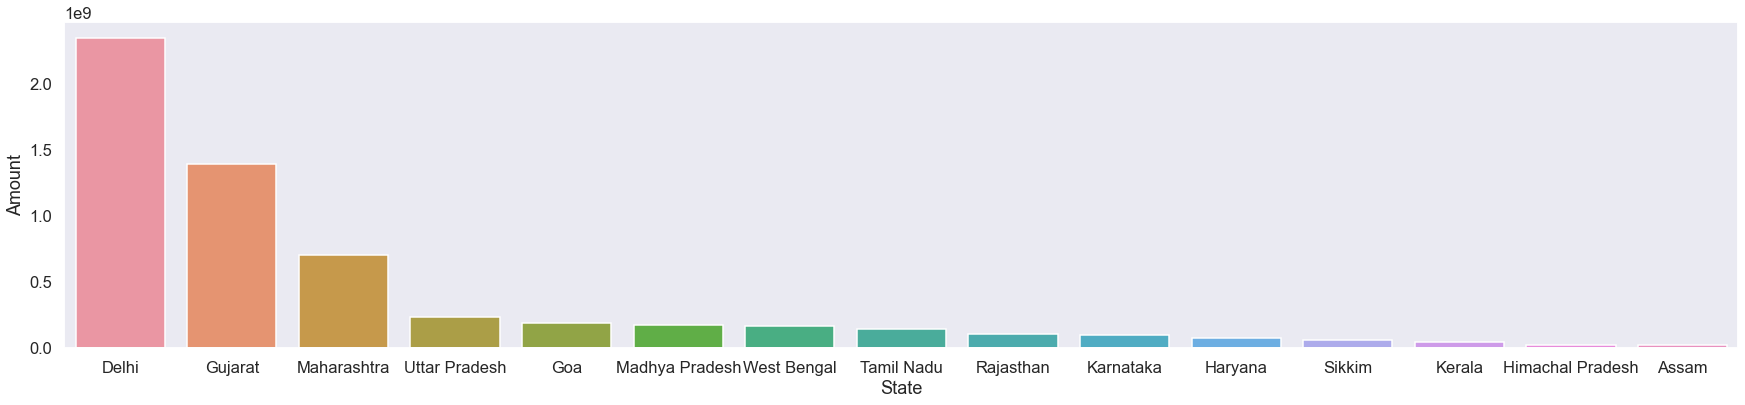

In [66]:
plt.rcParams['figure.figsize']=[30,6]
sns.barplot(x='State',y='Amount',data=state_wise_donations.head(15))

#### Conclusion: Delhi, Gujarat,Maharashtra are the top 3 most relevent states in terms of political donations.
#### Opinion: More developed States contribute more to political Donations. Therefore they should focus on devlopment!!!

### Q5 Which states are most relevent in terms of political donations(Amount/Revenue) for specific parties

##### Making a pivot table for easy ananlysis and to make heatmap 

In [67]:
pd.set_option('display.float_format', '{:.2f}'.format) #without this values will be displayed in exponential format

statewise_donations_2parties=cleaned_dataset.pivot_table(index="State",columns="Party",aggfunc=np.sum,margins=True)
statewise_donations_2parties

Amount                           \
Party                                     BJP         CPI        CPI-M   
State                                                                    
Andaman & Nicobar Islands                 nan         nan          nan   
Andhra Pradesh                    10040255.00    25000.00   2527000.00   
Arunachal Pradesh                  3998000.00         nan          nan   
Assam                              2493000.00    97177.00          nan   
Bihar                              7640351.00  1929980.00          nan   
Chandigarh *                        839000.00   450500.00    225000.00   
Chhattisgarh                      12161766.00   155093.00    120000.00   
Daman & Diu *                       900000.00         nan          nan   
Delhi                            914861786.00 33063046.00  89370770.00   
Goa                               86086321.00   149339.00          nan   
Gujarat                         1003746614.00   206000.00     50000.00   
Haryana                           39168000.00   125200.00          nan   
Himachal Pradesh                  19571000.00         nan     75000.00   
Jammu & Kashmir                    1465000.00         nan    120000.00   
Jharkhand                          7575000.00  1151086.00          nan   
Karnataka                         36884000.00   642151.00  10355355.00   
Kerala                            10300000.00  9181619.00  14178980.00   
LakshadweepDadra & Nagar Haveli      70000.00         nan          nan   
Madhya Pradesh                    58429102.00  2403344.00   6064107.00   
Maharashtra                      284033646.00  1744484.00          nan   
Manipur                                   nan   512655.00          nan   
Meghalaya                           550000.00         nan          nan   
Nagaland                            251000.00         nan          nan   
Orissa                             9399950.00   263434.00          nan   
Pondicherry                         176000.00    25000.00          nan   
Punjab                            12271000.00   660850.00     25000.00   
Rajasthan                         59664000.00   978546.00    120000.00   
Sikkim                            37283212.00         nan          nan   
Tamil Nadu                       132806000.00  2656570.00    170000.00   
Uttar Pradesh                    114203118.00  7369820.00   7471000.00   
Uttaranchal                        8297000.00         nan          nan   
West Bengal                       77810111.00  2075620.00   1480000.00   
All                             2952974232.00 65866514.00 132352212.00   

                                                                        
Party                                     INC          NCP         All  
State                                                                   
Andaman & Nicobar Islands            25000.00          nan       25000  
Andhra Pradesh                     7568551.00          nan    20160806  
Arunachal Pradesh                    28000.00          nan     4026000  
Assam                             18674400.00          nan    21264577  
Bihar                                91800.00   1500000.00    11162131  
Chandigarh *                        129600.00          nan     1644100  
Chhattisgarh                       1354201.00          nan    13791060  
Daman & Diu *                      2071200.00          nan     2971200  
Delhi                           1190732373.00 120125000.00  2348152975  
Goa                               98358409.00   3500000.00   188094069  
Gujarat                          328340901.00  60030000.00  1392373515  
Haryana                           39191125.00          nan    78484325  
Himachal Pradesh                   3695425.00     50000.00    23391425  
Jammu & Kashmir                    1058525.00          nan     2643525  
Jharkhand                          1525000.00          nan    10251086  
Karnataka                         54175901.00     20000.00  

<AxesSubplot:xlabel='None-Party', ylabel='State'>

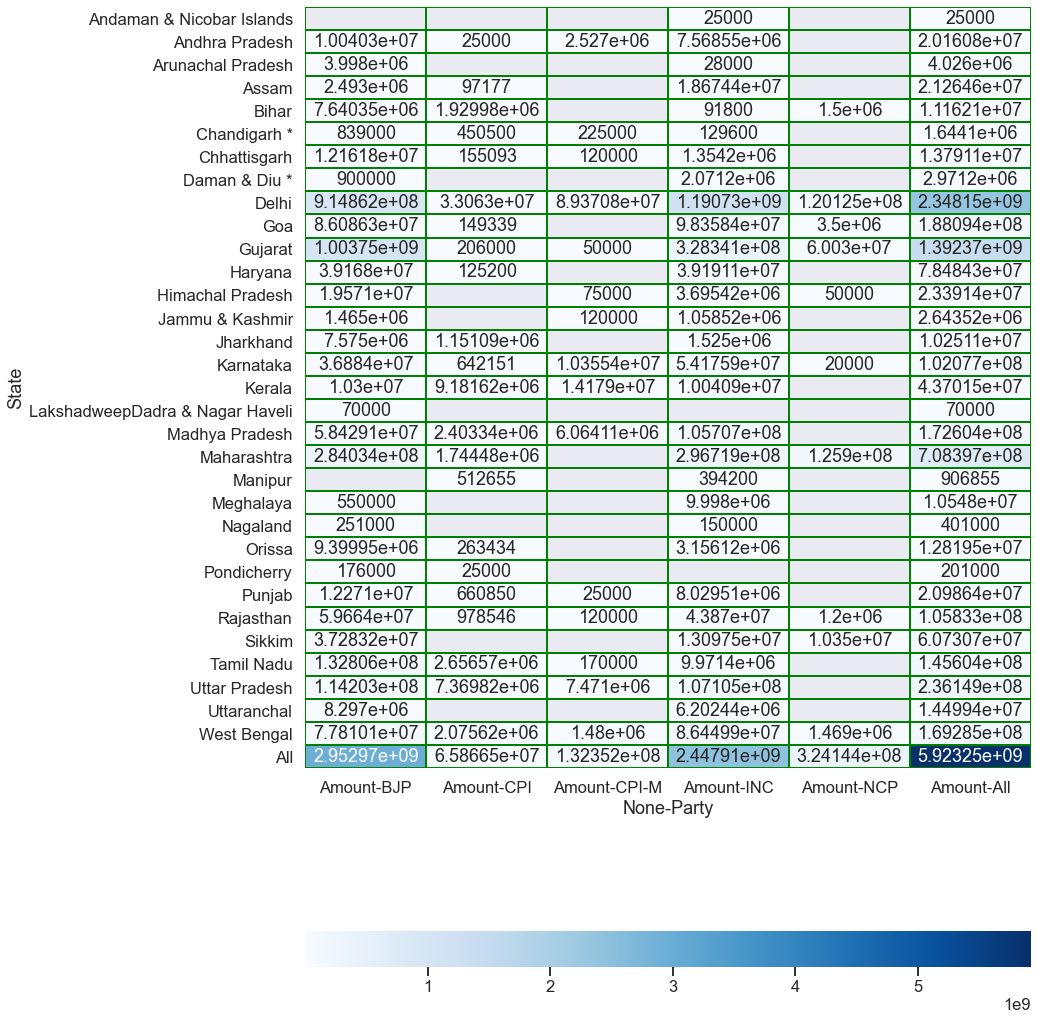

In [68]:
plt.rcParams['figure.figsize']=[13,20]
sns.heatmap(statewise_donations_2parties, annot=True, cmap='Blues',linecolor='green',linewidth=1,fmt='g',cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='Amount', ylabel='State'>

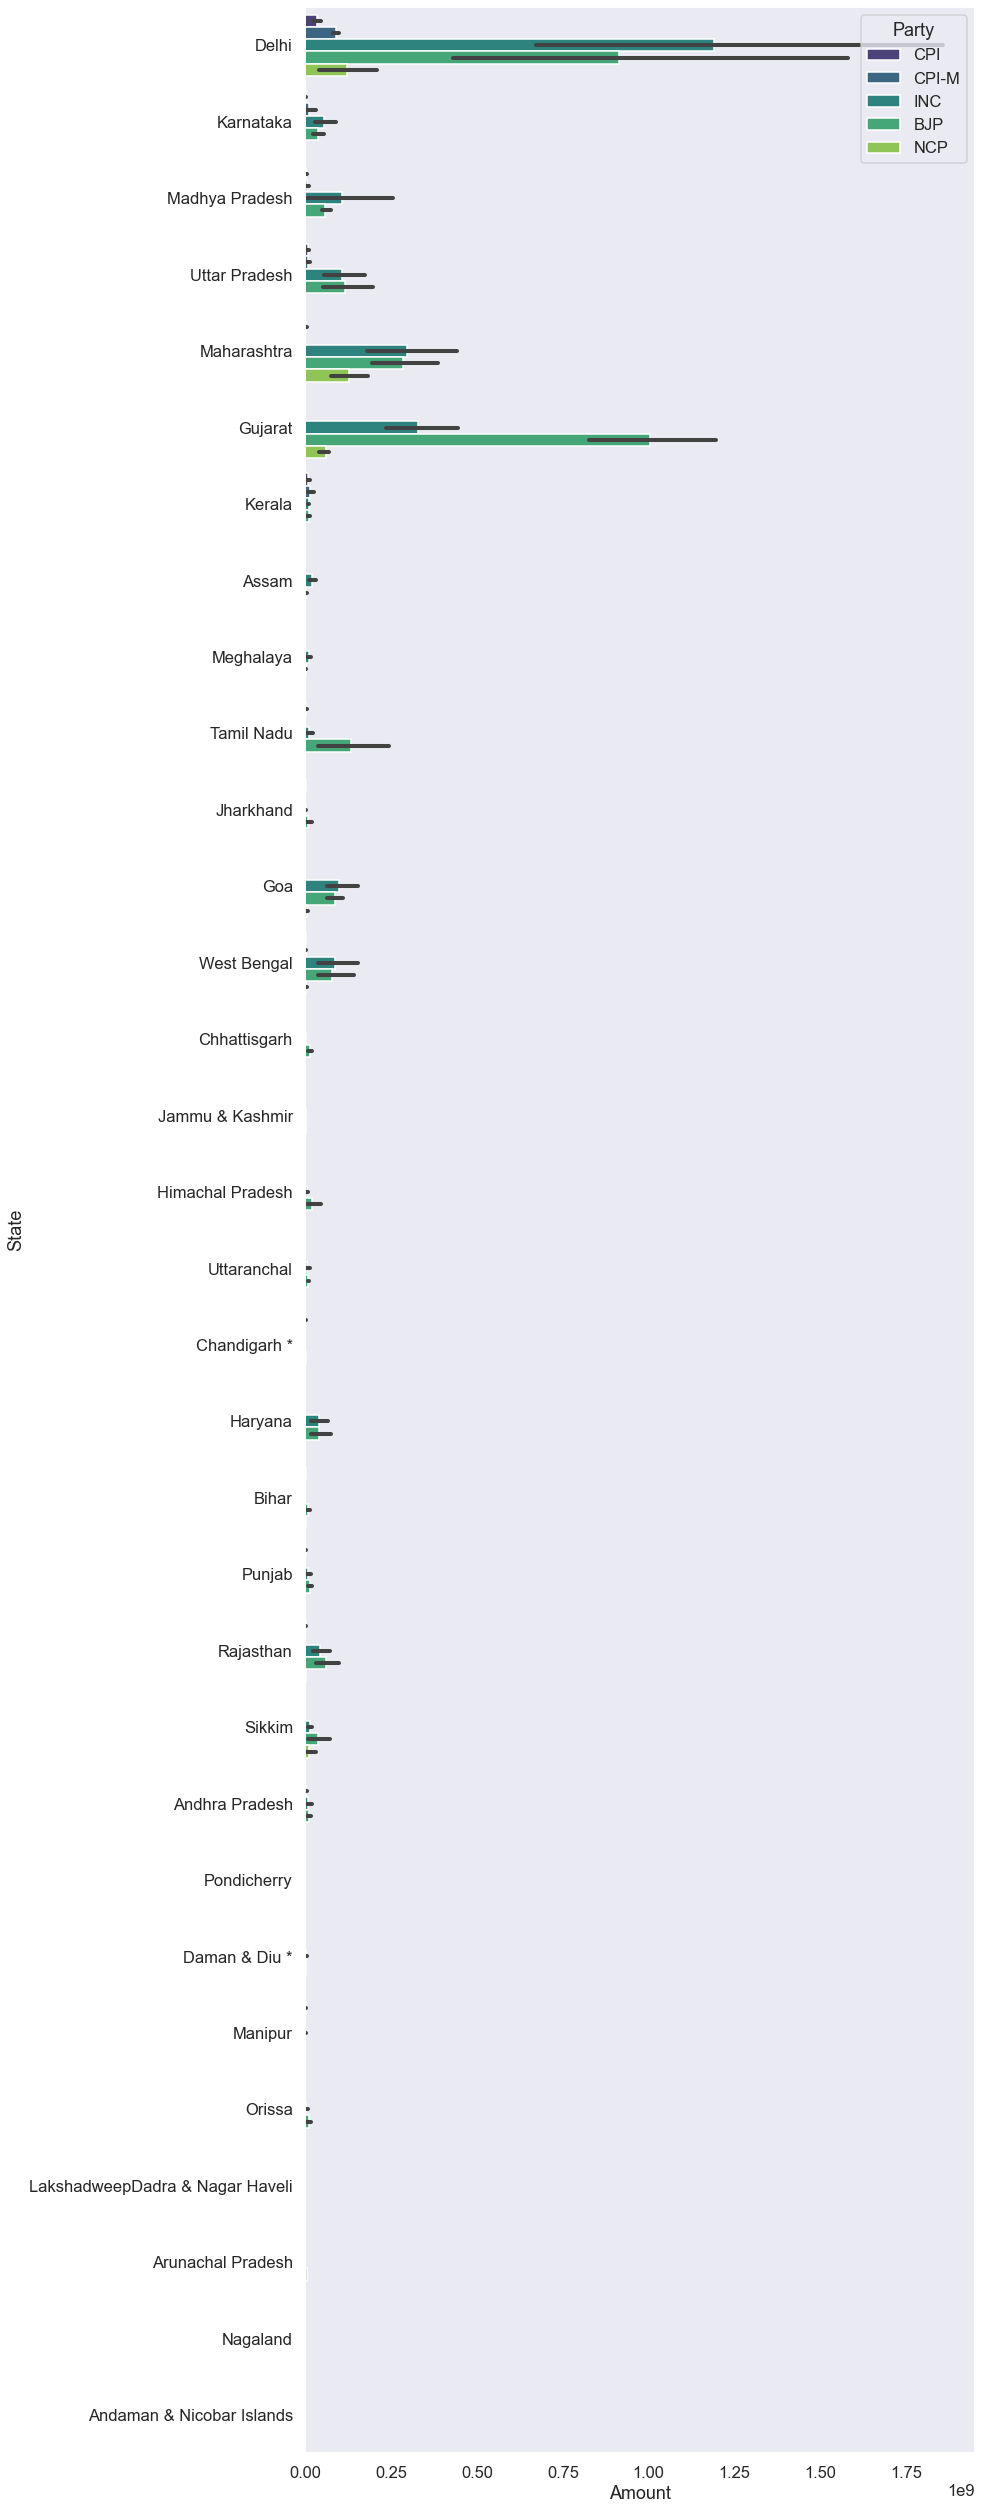

In [69]:
plt.rcParams['figure.figsize']=[12,45]
sns.barplot(y='State',x='Amount',hue="Party",data=cleaned_dataset, estimator=np.sum,orient='h',palette='viridis')

#### Conlclusion: 
#### For NCP top 3 relevent states are Delhi, Maharashtra and Gujrat
#### For CPI top 3 relevent states are Delhi, uttarpradesh and kerela
#### For CPI-M top 3 relevent states are Delhi, karnatka and kerela
#### For INC top 3 relevent states are Delhi, gujrat and Maharashtra
#### For BJP top 3 relevent states are Delhi, gujrat and Maharashtra

### Q6. Which states are most relevent in terms of Number of donators for specific parties

<AxesSubplot:xlabel='count', ylabel='State'>

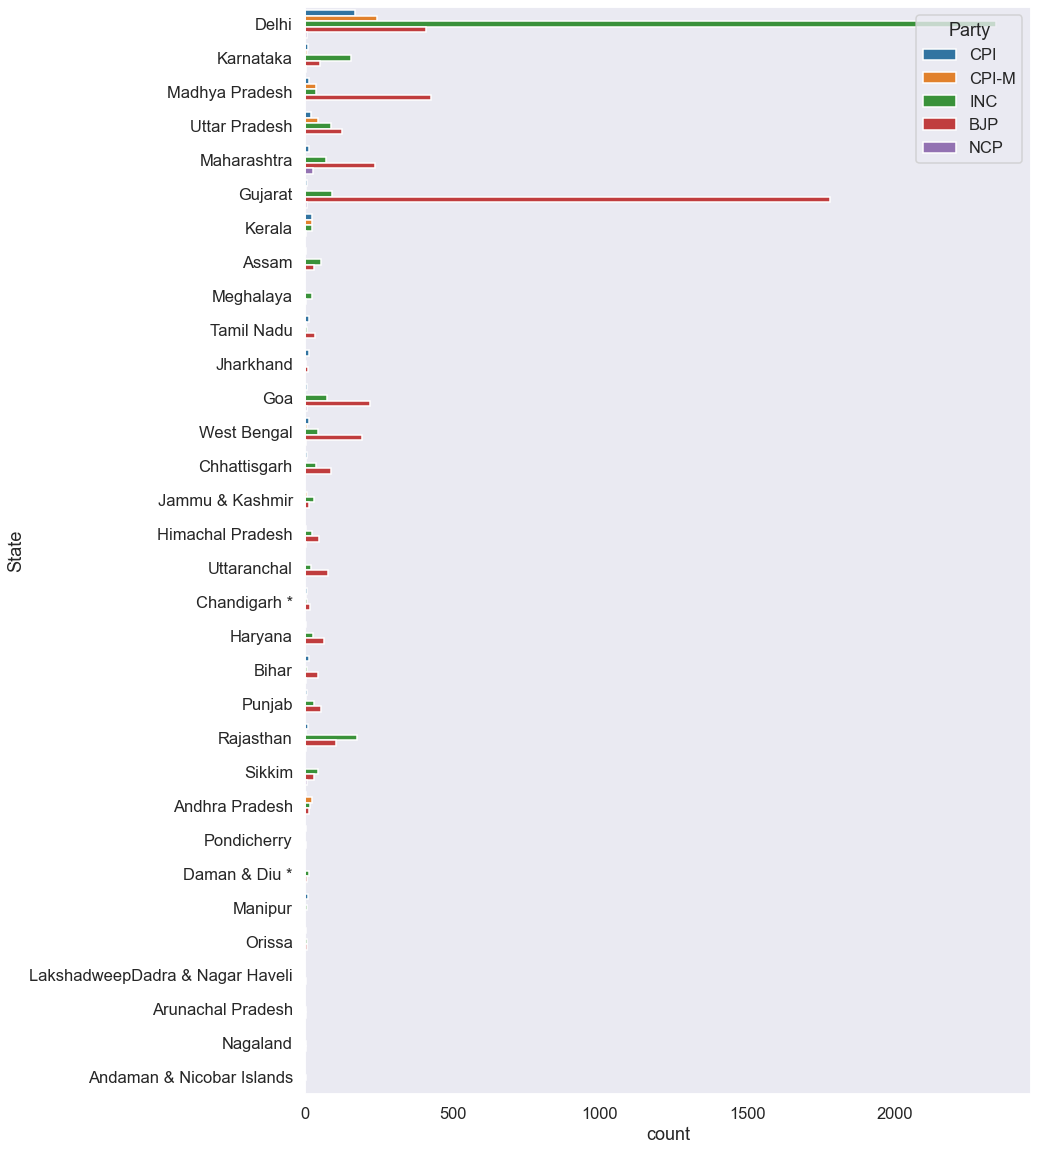

In [70]:
plt.rcParams['figure.figsize']=[13,20]
sns.countplot(y='State',hue="Party",data=cleaned_dataset,orient='h')

##### Making a pivot table for easy ananlysis and making stripplot

In [71]:
pd.set_option('display.max_columns', None) #To Display every column Dataset
pd.set_option('display.max_rows', None) ##To Display every column Dataset

statewise_donations_count_2parties=pd.DataFrame(groupby_state["Party"].value_counts()) 
#using groupby_state to make a dataFrame in which no donations received by a party is counted as seprate column

statewise_donations_count_2parties=statewise_donations_count_2parties.rename(columns={'Party':'Donation_count'}).reset_index()
#reseting index and giving relevent name to columns before making pivot table

statewise_donations_count_2parties.pivot_table(index="State",columns="Party",margins=True) #making pivot table here


Donation_count                              \
Party                                      BJP    CPI  CPI-M     INC   NCP   
State                                                                        
Andaman & Nicobar Islands                  nan    nan    nan    1.00   nan   
Andhra Pradesh                           13.00   1.00  21.00   17.00   nan   
Arunachal Pradesh                         1.00    nan    nan    1.00   nan   
Assam                                    31.00   3.00    nan   53.00   nan   
Bihar                                    43.00  11.00    nan    4.00  1.00   
Chandigarh *                             17.00   7.00   3.00    4.00   nan   
Chhattisgarh                             88.00   5.00   2.00   37.00   nan   
Daman & Diu *                             5.00    nan    nan   11.00   nan   
Delhi                                   409.00 167.00 245.00 2346.00  6.00   
Goa                                     221.00   5.00    nan   75.00  4.00   
Gujarat                                1783.00   7.00   1.00   91.00  7.00   
Haryana                                  63.00   2.00    nan   26.00   nan   
Himachal Pradesh                         46.00    nan   2.00   23.00  1.00   
Jammu & Kashmir                          12.00    nan   4.00   28.00   nan   
Jharkhand                                 9.00  13.00    nan    3.00   nan   
Karnataka                                49.00  10.00   5.00  156.00  1.00   
Kerala                                    3.00  21.00  24.00   23.00   nan   
LakshadweepDadra & Nagar Haveli           2.00    nan    nan     nan   nan   
Madhya Pradesh                          428.00  14.00  35.00   35.00   nan   
Maharashtra                             236.00  14.00    nan   69.00 26.00   
Manipur                                    nan   9.00    nan    5.00   nan   
Meghalaya                                 2.00    nan    nan   24.00   nan   
Nagaland                                  1.00    nan    nan    1.00   nan   
Orissa                                    6.00   2.00    nan    7.00   nan   
Pondicherry                               3.00   1.00    nan     nan   nan   
Punjab                                   54.00   6.00   1.00   31.00   nan   
Rajasthan                               105.00  10.00   3.00  175.00  1.00   
Sikkim                                   30.00    nan    nan   43.00  5.00   
Tamil Nadu                               32.00  11.00   3.00    7.00   nan   
Uttar Pradesh                           125.00  20.00  44.00   86.00   nan   
Uttaranchal                              77.00    nan    nan   18.00   nan   
West Bengal                             192.00  13.00   6.00   44.00  3.00   
All                                     136.20  16.00  26.60  114.80  5.50   

                                        
Party                              All  
State                                   
Andaman & Nicobar Islands         1.00  
Andhra Pradesh                   13.00  
Arunachal Pradesh                 1.00  
Assam                            29.00  
Bihar                            14.75  
Chandigarh *                      7.75  
Chhattisgarh                     33.00  
Daman & Diu *                     8.00  
Delhi                           634.60  
Goa                              76.25  
Gujarat                         377.80  
Haryana                          30.33  
Himachal Pradesh                 18.00  
Jammu & Kashmir                  14.67  
Jharkhand                         8.33  
Karnataka                        44.20  
Kerala                           17.75  
LakshadweepDadra & Nagar Haveli   2.00  
Madhya Pradesh                  128.00  
Maharashtra                      86.25  
Manipur                           7.00  
Meghalaya                        13.00  
Nagaland                          1.00  
Orissa                            5.00  
Pondicherry                       2.00  
Punjab                           23.00  
Rajasthan                        5

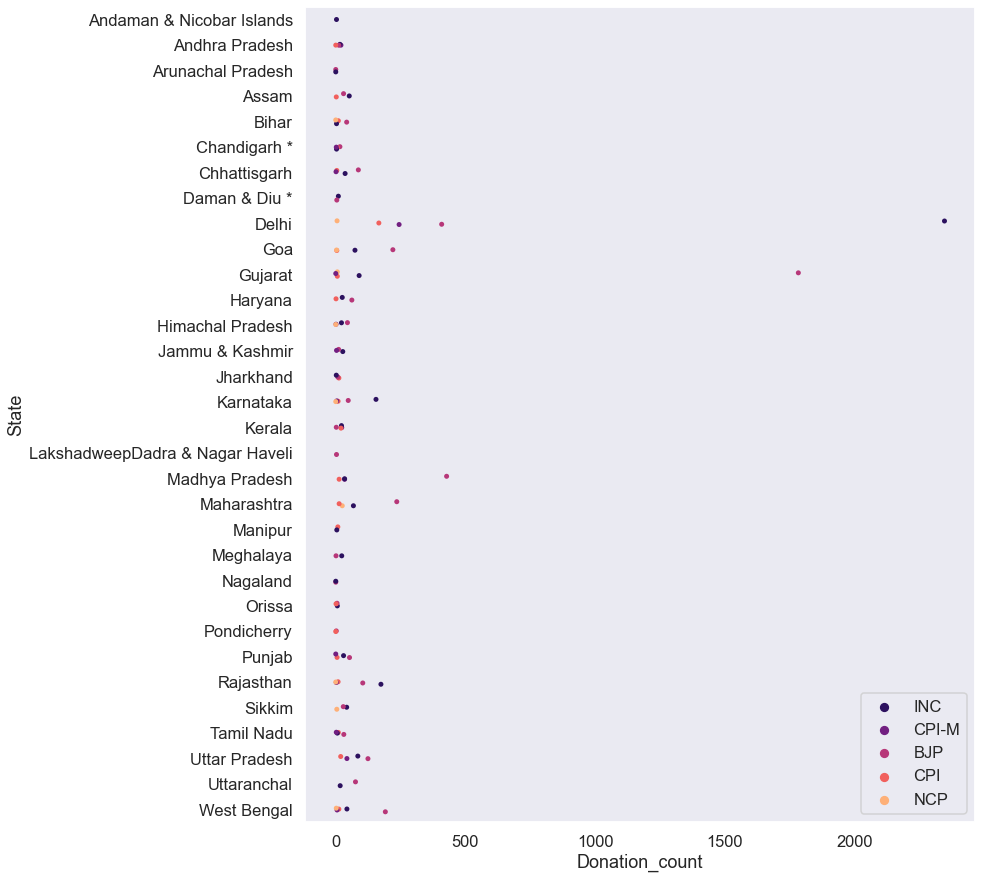

In [72]:
plt.rcParams['figure.figsize']=[12,15]
sns.set_style('dark') #used for styling
sns.set_context('talk') #used for styling

sns.stripplot(y='State',x='Donation_count',data=statewise_donations_count_2parties, jitter=True ,hue='Party',palette='magma') #
plt.legend(loc='lower right') 

#### conclusion: (states having max no donators for a party) Note:Donators can be repete therefore cannot be taken as popularity there
#### BJP has 1783 donators from Gujrat
#### INC has 2346 donators from Delhi
#### CPI-M has 245 donators from Delhi
#### CPI has 167 donators from Delhi
#### NCP has 634 donators from Delhi

### Q7. year wise distribution of Donations

In [73]:
groupby_Financial_Year=cleaned_dataset.groupby(['Financial_Year'])  #grouping based on Financial_Year
groupby_Financial_Year

In [74]:
year_wise_donations=pd.DataFrame(groupby_Financial_Year["Amount"].sum())
year_wise_donations=year_wise_donations.reset_index()
year_wise_donations

,Financial_Year,Amount
0,2003-04,35226867
1,2004-05,217565798
2,2005-06,83888182
3,2006-07,30532313
4,2007-08,204150751
5,2008-09,402259291
6,2009-10,909827809
7,2010-11,214714459
8,2011-12,249984623
9,2012-13,562190743


<AxesSubplot:>

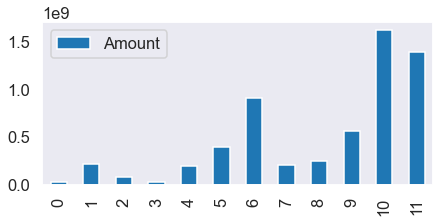

In [75]:
plt.rcParams['figure.figsize']=[7,3]
year_wise_donations.plot.bar()

#### Conclusion: There is a Trend which suggest slight surge in amount of donations during election years 2004,2009,2014

### Q8. Does Donation recieved by political parties near election years suggest winning party

In [76]:
cleaned_dataset.pivot_table(index="Financial_Year",columns="Party",margins=True)

Amount                                             \
Party                 BJP       CPI     CPI-M        INC         NCP   
Financial_Year                                                         
2003-04         175626.75  43286.00  32000.00   78377.79         nan   
2004-05         896818.80  48461.54  49642.69  785049.85         nan   
2005-06         285602.41 104960.30  87500.00  167766.35         nan   
2006-07         247657.89  60911.11 100000.00  212361.68         nan   
2007-08        1081429.82 152807.41 183333.33  713256.68   100000.00   
2008-09        1590464.39 201250.00 555000.00 1853755.59  4018200.00   
2009-10        2790381.68 295615.59       nan 2819972.14  2300000.00   
2010-11         345257.47 224822.19 242755.19  196790.20    83333.33   
2011-12         181451.49 175232.58 316639.96  246479.61   500000.00   
2012-13         291157.80 160671.70 394285.49  168349.70    53000.00   
2013-14        2022088.35 240752.34 308691.91  811952.03 11822727.27   
2014-15        1439632.63 258797.55 473908.42 2382974.20  7360000.00   
All             722705.39 187120.78 331709.80  710775.86  5893527.27   

                           
Party                 All  
Financial_Year             
2003-04         122315.51  
2004-05         766076.75  
2005-06         183965.31  
2006-07         198261.77  
2007-08         794360.90  
2008-09        1690165.09  
2009-10        2584738.09  
2010-11         259630.54  
2011-12         207284.10  
2012-13         256825.37  
2013-14        1274608.14  
2014-15        1713312.09  
All             710562.50

<AxesSubplot:xlabel='None-Party', ylabel='Financial_Year'>

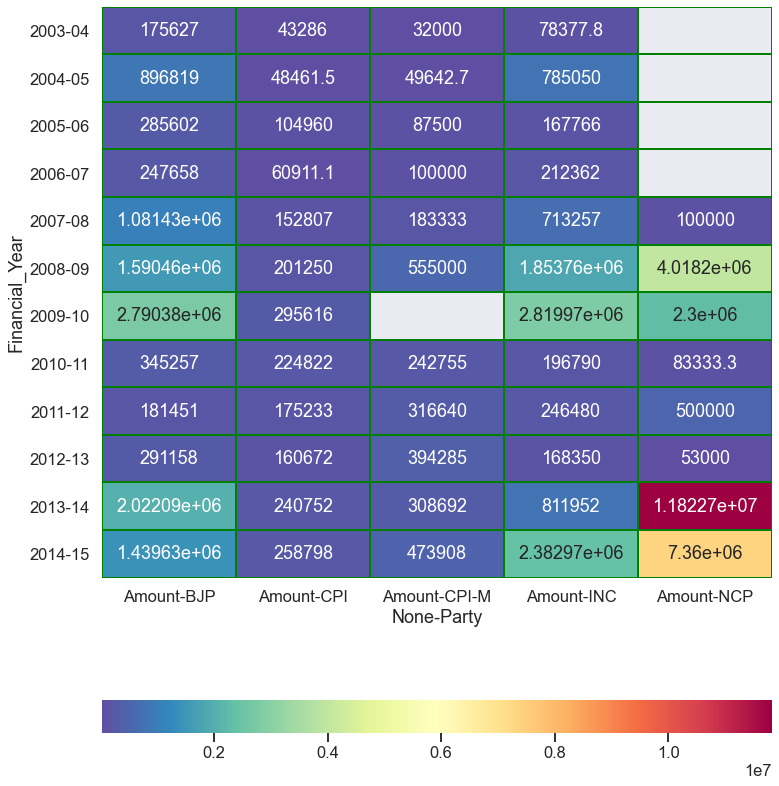

In [80]:
plt.rcParams['figure.figsize']=[12,15]

yearly_donations_2parties=cleaned_dataset.pivot_table(index="Financial_Year",columns="Party")
yearly_donations_2parties

sns.heatmap(yearly_donations_2parties, annot=True, cmap='Spectral_r',linecolor='green',linewidth=1,fmt='g',cbar_kws={"orientation": "horizontal"})

#### Conclusion: As shown by heat map party which recives most donations in two concecutive years i.e election year and year previous to that, WIN's THE ELECTION.
if we leave NCP out of context!!!
#### election year ---- 2yrs donation -------------------- winner  
#### 2004--------------78377.79+785049.85=863427.64-------(INC)  
#### 2009--------------1081429.82+1590464.39=4673727.73---(INC)  
#### 2014--------------1439632.63+2022088.35=3461720.98---(BJP)  

# Summary of Conclusions

    Satya Electoral Trust India’s biggest political funding trust 
    Delhi, Maharashtra, Gujrat,karnatka and kerela 
    More developed States contribute more to political Donations.
    Trend suggest relvent surge in amount of donations during election years
    party which recives most donations for two concecutive years, WIN's THE ELECTION (neglecting NCP)

# Future Work

• Much of the data was dropped during cleaning because of missing values, which after processing can become relevent

• Dataset can be used to train ML-models to detect anonymous political Transactions.

• Encoding can be applied to categotical Data to get mode accurate results

• Further more Relevent Question can be answerd with thorough examination. 


# Reference

[political Donations Kagel Dataset](https://www.kaggle.com/sachinsharma1123/donations-to-indian-political-parties)  
[Indian Cities Datset](https://censusindia.gov.in/Tables_Published/Admin_Units/Admin_links/Town_Codes_2001.xls)  
[election Years](https://en.wikipedia.org/wiki/List_of_Indian_general_elections)  


In [78]:
!nvidia-smi

Mon Oct 12 04:13:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.55       Driver Version: 456.55       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8    N/A /  N/A |     77MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
